For this DA I will study and test it the mini batch gradient descent in order to take adventage of the parallel computation in the optimization process.
First we will study a single thread approach and finally we will implement by means of threads a parallel computation of the algorithm

In [2]:
%matplotlib inline  
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

In [3]:
def E(m,b):
    # cost function 
    global points
    N = float(len(points))
    error = 0
    for point in points:
        error += (point[0]-(m*point[1] + b)) ** 2
    return error / N

In [4]:
points = genfromtxt("data.csv", delimiter=",")
data_X = [p[0] for p in points]
data_Y = [p[1] for p in points]

# data is also in the same git-folder in varungupta04 account

In [5]:
def step_gradient(m,b,points, alpha = 0.00005):
    # Calculate the drop of each parameter in the function (m,b)
    # by means of the derivate functions

    N = float(len(points))
    m_descend = 0.0
    b_descend = 0.0
    for point in points:
        m_descend += -(2/N) * point[0]*(point[1]-((m*point[0]) + b))
        b_descend += -(2/N) * (point[1]-((m*point[0]) + b))
    m_descend = m - (m_descend * alpha) 
    b_descend = b - (b_descend * alpha)
    return (m_descend, b_descend)

In [6]:
precision = 0.00001
batch_size = 10
m_old = -2
b_old = 0

points_batch = []
for i in xrange(0, len(points), batch_size):
    points_batch.append(points[i:i+batch_size])

parameter_its = [(m_old, b_old)]
for batch in points_batch:
    m_new,b_new = step_gradient(m_old, b_old, batch)
    parameter_its.append((m_new,b_new))
    if (abs(m_old-m_new)) < precision:
        print(" (%s it), no more precission achieved" % iteration)
        break
    m_old = m_new
    b_old = b_new
print("m:%s, b:%s" % (round(m_new,3), round(b_new, 3)))

m:1.316, b:0.065


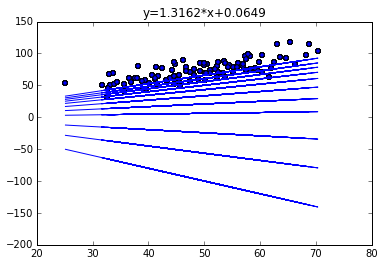

In [49]:
def plot_points_and_modelfit(m,b,toFile=False,iteration=0):
    """
    """
    ablineValues = []
    for x in data_X:
        ablineValues.append(m*x+b)

    plt.scatter(data_X,data_Y)
    plt.plot(data_X, ablineValues, 'b')
    plt.title("y=%s*x+%s" % (round(m_new,4),round(b_new,4)))
    if toFile:
        plt.savefig('/tmp/tmp_%s.png' % iteration, bbox_inches='tight')
    else:
        plt.show()

for parameter in parameter_its:
    plot_points_and_modelfit(parameter[0],parameter[1], True)